In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("insurance.csv") # expense prediction dataset
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


## Data cleaning

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


- no null values are found

In [4]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [5]:
for cat_col in data.select_dtypes("object").columns:
    print(f"Unique values in {cat_col} = {data[cat_col].unique()}")

Unique values in sex = ['female' 'male']
Unique values in smoker = ['yes' 'no']
Unique values in region = ['southwest' 'southeast' 'northwest' 'northeast']


- object type columns have no misspelled values
- No data cleaning required

In [6]:
for cat_col in data.select_dtypes(["int","float"]).columns:
    print(f"Unique values in {cat_col} = {data[cat_col].unique()}")

Unique values in age = [19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
Unique values in bmi = [27.9 33.8 33.  22.7 28.9 25.7 33.4 27.7 29.8 25.8 26.2 26.3 34.4 39.8
 42.1 24.6 30.8 23.8 40.3 35.3 36.  32.4 34.1 31.9 28.  23.1 32.8 17.4
 36.3 35.6 28.6 28.3 36.4 20.4 20.8 36.7 39.9 26.6 36.6 21.8 37.1 37.3
 38.7 34.8 24.5 35.2 33.6 28.7 37.  31.8 31.7 22.9 27.4 33.7 24.7 25.9
 22.4 39.1 36.2 24.  24.8 28.5 28.1 32.  34.  29.6 35.5 26.9 38.3 37.6
 41.2 31.2 27.2 27.  39.5 31.3 20.  19.3 31.6 25.5 30.1 29.9 27.5 28.4
 30.9 35.1 29.7 35.7 32.2 49.1 23.4 29.  31.4 33.9 28.8 37.4 17.8 34.7
 26.5 22.  35.9 25.6 25.2 32.5 25.3 38.8 30.5 37.7 24.1 24.4 27.8 36.9
 39.6 28.2 33.2 18.9 41.5 30.3 16.  33.3 29.2 26.4 30.7 41.9 32.1 30.6
 18.1 39.3 36.1 22.3 26.7 23.2 38.1 22.2 38.4 29.1 22.1 26.8 30.  20.9
 17.3 34.2 25.4 40.2 24.3 42.4 19.8 30.2 29.4 27.6 20.6 21.6 40.6 48.1
 36.8 45.5 23.  22.6 37.5 38.

In [24]:
print(data["bmi"].max())
print(data["bmi"].min())

print(data["age"].max())
print(data["age"].min())

53.1
16.0
64
18


In [27]:
# Define bin boundaries and labels
age_bins = [17, 25, 35, 60, 100]
age_labels = ["Youth", "YoungAdult", "MiddleAged", "Senior"]
bmi_bins = [10, 15, 20, 25, 30, 35,40,45,50,55,60]
bmi_labels = ["10-15", "15-20", "20-25", "25-30","30-35","35-40","40-45","45-50","50-55","55-60"]

# Apply pd.cut()
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)
data['bmi_group'] = pd.cut(data['bmi'], bins=bmi_bins, labels=bmi_labels)

data


,age,sex,bmi,children,smoker,region,expenses,age_group,bmi_group
0,19,female,27.9,0,yes,southwest,16884.92,Youth,25-30
1,18,male,33.8,1,no,southeast,1725.55,Youth,30-35
2,28,male,33.0,3,no,southeast,4449.46,YoungAdult,30-35
3,33,male,22.7,0,no,northwest,21984.47,YoungAdult,20-25
4,32,male,28.9,0,no,northwest,3866.86,YoungAdult,25-30
...,...,...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55,MiddleAged,30-35
1334,18,female,31.9,0,no,northeast,2205.98,Youth,30-35
1335,18,female,36.9,0,no,southeast,1629.83,Youth,35-40
1336,21,female,25.8,0,no,southwest,2007.95,Youth,25-30


# EDA

### Univariate analysis

C:\Users\HP\AppData\Local\Temp\ipykernel_14004\2042598748.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_exp = data.groupby("age_group")[["expenses"]].mean().reset_index()


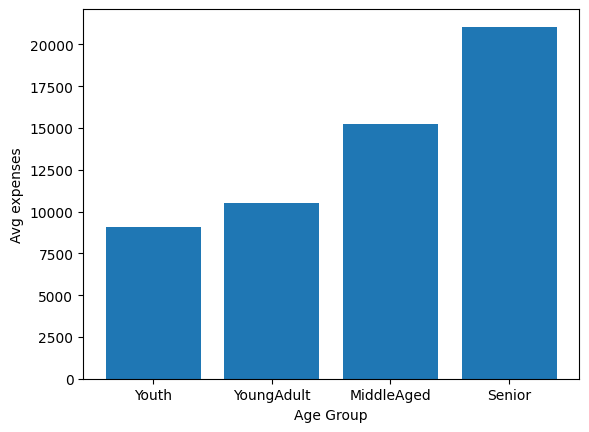

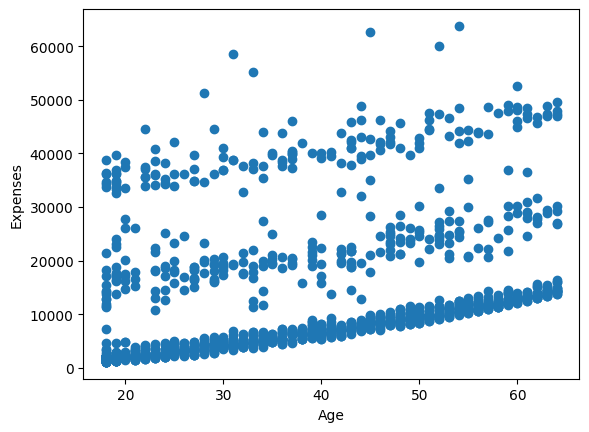

In [28]:
age_exp = data.groupby("age_group")[["expenses"]].mean().reset_index()
plt.bar(age_exp['age_group'],age_exp['expenses'])
plt.xlabel("Age Group")
plt.ylabel("Avg expenses")
plt.show()

# age_exp = data.groupby("age")[["expenses"]].mean().reset_index()
plt.scatter(data['age'],data['expenses'])
plt.xlabel("Age")
plt.ylabel("Expenses")
plt.show()

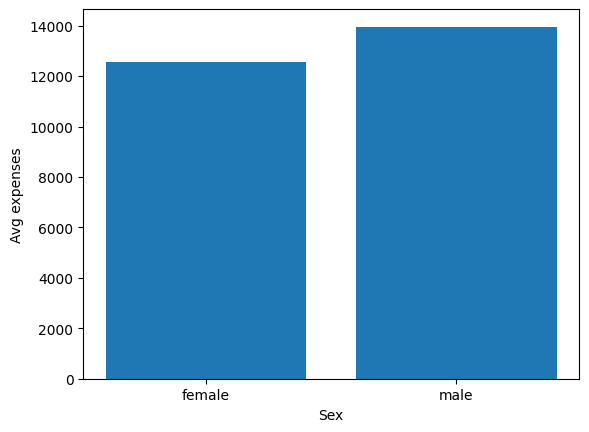

In [16]:
sex_exp = data.groupby("sex")[["expenses"]].mean().reset_index()
plt.bar(sex_exp['sex'],sex_exp['expenses'])
plt.xlabel("Sex")
plt.ylabel("Avg expenses")
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_14004\1351983852.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bmi_exp = data.groupby("bmi_group")[["expenses"]].mean().reset_index()


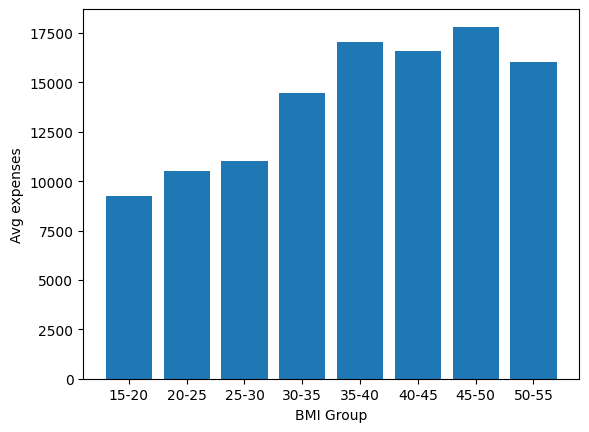

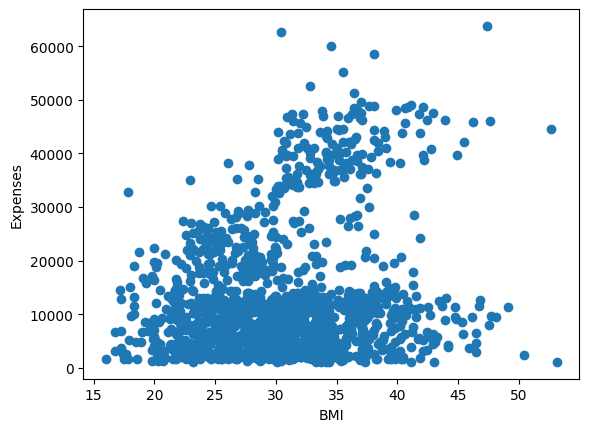

In [30]:
bmi_exp = data.groupby("bmi_group")[["expenses"]].mean().reset_index()
plt.bar(bmi_exp['bmi_group'],bmi_exp['expenses'])
plt.xlabel("BMI Group")
plt.ylabel("Avg expenses")
plt.show()

plt.scatter(data['bmi'],data['expenses'])
plt.xlabel("BMI")
plt.ylabel("Expenses")
plt.show()

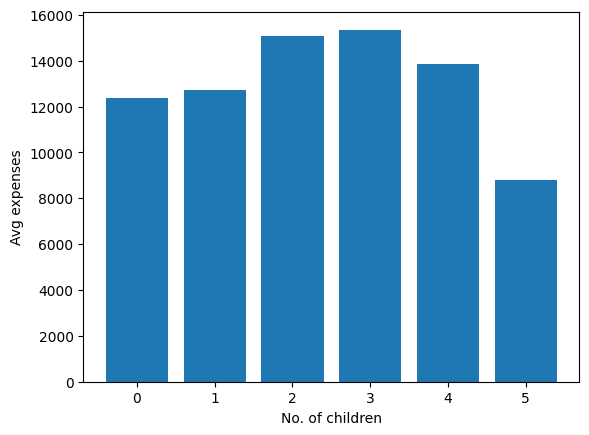

In [17]:
child_exp = data.groupby("children")[["expenses"]].mean().reset_index()
plt.bar(child_exp['children'],child_exp['expenses'])
plt.xlabel("No. of children")
plt.ylabel("Avg expenses")
plt.show()

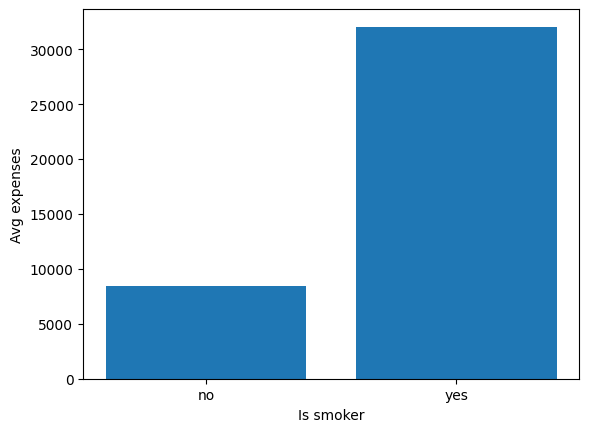

In [18]:
smoke_exp = data.groupby("smoker")[["expenses"]].mean().reset_index()
plt.bar(smoke_exp['smoker'],smoke_exp['expenses'])
plt.xlabel("Is smoker")
plt.ylabel("Avg expenses")
plt.show()

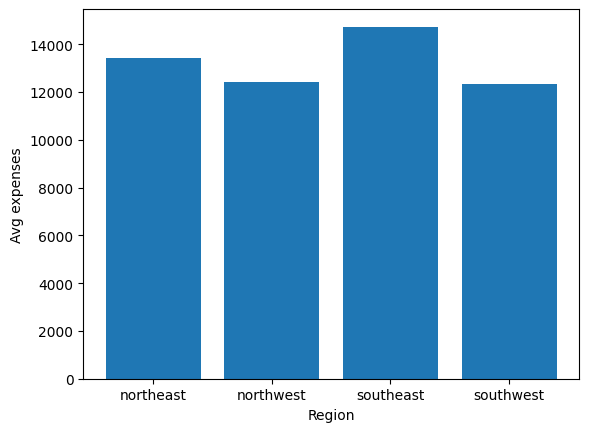

In [19]:
region_exp = data.groupby("region")[["expenses"]].mean().reset_index()
plt.bar(region_exp['region'],region_exp['expenses'])
plt.xlabel("Region")
plt.ylabel("Avg expenses")
plt.show()